In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [3]:
to_path = r"E:\Netease\智慧城市\4.处理数据"

# 一、数据查看检验

## 1）矢量数据查看

### 叠加查看

Text(0.5, 1.0, 'track_all')

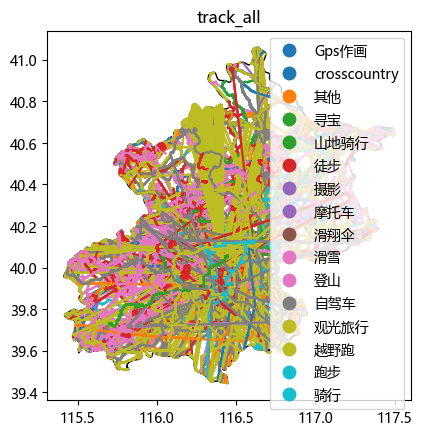

In [12]:
#### 合并数据查看

# 绘制北京市边界
df_bj = gpd.read_file(to_path+r"\rawdata\北京市行政边界.shp")
ax = df_bj.plot(color="none",figsize=(12,12))

# 增绘轨迹位置
df = gpd.read_file(to_path+r"\workingdata2\track_all.shp")
df.plot(ax=ax,column="triptype",legend=True)

# 设置标题
ax.set_title("track_all")

In [11]:
df.head()

,tripid,location,title,triptime,triptype,geometry
0,173075,北京 怀柔区 - 北京 密云县,20140531后山铺-云蒙山-万岁杨-云蒙峡-对家河,"于 2014-05-31 09:57 出发,历时 9 小时, 45 分钟",登山,"MULTILINESTRING ((116.67672 40.57588, 116.6768..."
1,173075,北京 怀柔区 - 北京 密云县,20140531后山铺-云蒙山-万岁杨-云蒙峡-对家河,"于 2014-05-31 09:57 出发,历时 9 小时, 45 分钟",登山,"MULTILINESTRING ((116.67672 40.57588, 116.6768..."
2,904597,北京 密云县 - 北京 密云县,带芽走长城~二十四眼楼环穿,"于 2016-05-14 09:50 出发,历时 5 小时, 22 分钟",徒步,"MULTILINESTRING ((117.19002 40.68729, 117.1899..."


In [3]:
def graph(i):
    # 绘制北京市边界
    df_bj = gpd.read_file(to_path+r"\rawdata\北京市行政边界.shp")
    ax = df_bj.plot(color="none")

    # 增绘轨迹位置
    df = gpd.read_file(to_path+r"\workingdata\track_zj_{}.shp".format(i))
    df.plot(ax=ax,column="triptype",legend=True)
    
    # 设置标题
    ax.set_title("track_zj_{}".format(i))

def graph_all(i_lst):
    # 绘制北京市边界
    df_bj = gpd.read_file(to_path+r"\rawdata\北京市行政边界.shp")
    ax = df_bj.plot(color="none")

    # 增绘轨迹位置
    for i in i_lst:    
        df = gpd.read_file(to_path+r"\workingdata\track_zj_{}.shp".format(i))
        df.plot(ax=ax,column="triptype")
    
    # 设置标题
    ax.set_title("track_zj_{}-{}".format(i_lst[0],i_lst[-1]))

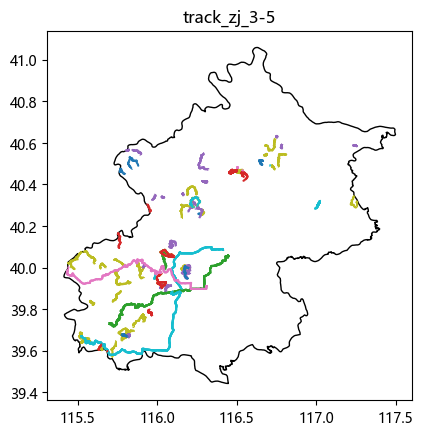

In [49]:
graph_all([3,4,5])

### 简单查看

<Axes: >

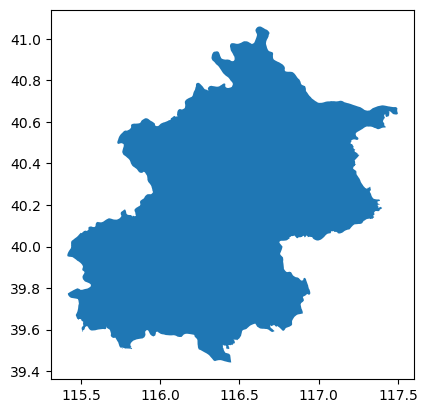

In [3]:
df = gpd.read_file(to_path+r"\rawdata\北京市行政边界.shp")
df.plot()

In [4]:
df.head()

,tripid,location,title,triptime,triptype,geometry
0,4778,北京 房山区 - 北京 房山区,穿越“猫耳山”！,"于 2010-05-22 08:54 出发,历时 10 小时, 47 分钟",登山,"MULTILINESTRING ((115.84917 39.71467, 115.8497..."
1,161530,北京 房山区 - 北京 房山区,房山:三尖连穿(涞沥水-官财山-三岔-黑牛峰-大洼尖-庄户-白云陀-圣水峪),"于 2014-04-27 07:20 出发,历时 8 小时, 46 分钟",登山,"MULTILINESTRING ((115.84955 39.69568, 115.8453..."
2,371932,北京 北京市区 - 北京 房山区,GH-红井路线-规划,"于 2015-03-29 09:10 出发,历时 1 小时, 8 分钟",山地骑行,"LINESTRING (116.43353 40.05122, 116.43376 40.0..."
3,109702,北京 昌平区 - 北京 房山区,北京十渡+东湖景区,"于 2013-10-15 08:10 出发,历时 5 小时, 49 分钟",观光旅行,"MULTILINESTRING ((116.41429 40.08112, 116.4144..."
4,1109484,北京 房山区 - 北京 房山区,东乐亭刘财坨西乐亭探路,"于 2017-02-05 07:55 出发,历时 8 小时, 15 分钟",登山,"MULTILINESTRING ((115.53791 39.65993, 115.5379..."


## 2）栅格数据查看

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

# 打开tif文件
dataset = gdal.Open(r"E:\Netease\dem\merged1.tif")

# 获取波段数
print(dataset.RasterCount)

# 读取每个波段为numpy数组
band1 = dataset.GetRasterBand(1)
b1 = band1.ReadAsArray()

# 将三个数组叠加为一个图像
img = np.dstack((b1))

# 绘制图像
img.plot()

Text(0.5, 1.0, '条形图')

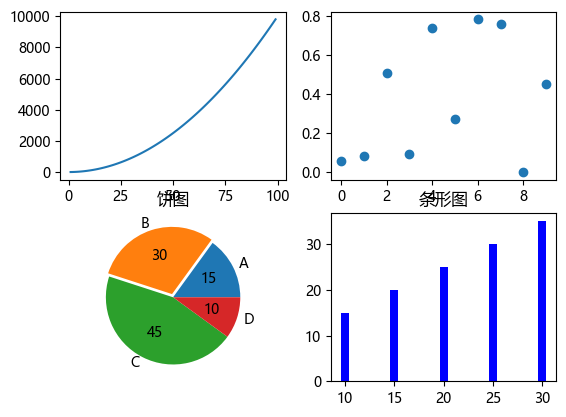

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 画第1个图：折线图
x=np.arange(1,100)
plt.subplot(221)
plt.plot(x,x*x)
# 画第2个图：散点图
plt.subplot(222)
plt.scatter(np.arange(0,10), np.random.rand(10))
# 画第3个图：饼图
plt.subplot(223)
plt.pie(x=[15,30,45,10],labels=list('ABCD'),autopct='%.0f',explode=[0,0.05,0,0])
plt.title("饼图")
# 画第4个图：条形图
plt.subplot(224)
plt.bar([20,10,30,25,15],[25,15,35,30,20],color='b')
plt.title("条形图")

# 二、数据分类实验

<Axes: >

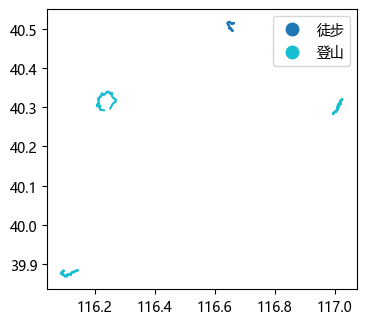

In [11]:
df = gpd.read_file(to_path+r"\workingdata\track_zj_4.shp")
df.plot(column="triptype",legend=True,figsize=(4,4))

<Axes: >

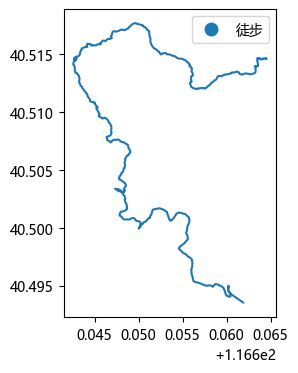

In [14]:
df1 = df[df["triptype"]=="徒步"]
df1.plot(column="triptype",legend=True,figsize=(4,4))